## Credit Risk Scoring Dataset

### Domain - Banking
### Dataset - Click here to download the dataset: https://drive.google.com/file/d/1pFQv3ejF-ebhwJ7vUyxh5QtsDpemq0ln/view?usp=sharing

### Detailed data description of Credit Risk dataset:
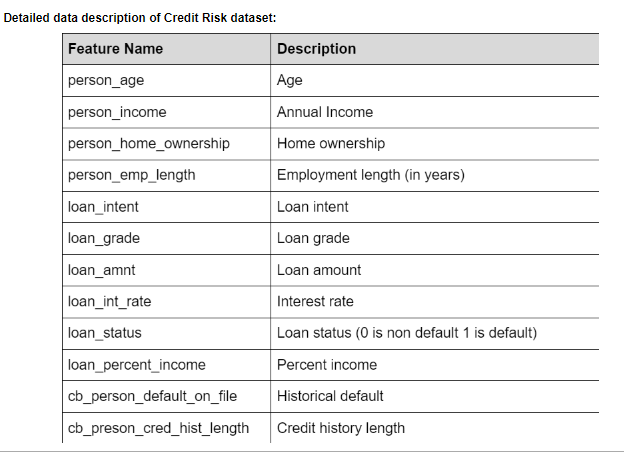

### Business Understanding

Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic growth by facilitating the channeling of saving decisions into productive investment. A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. 

In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. 

Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc.. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". 

Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").

By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important. 

Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.


## Problem statement:
- Problem Statement - Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [5]:
out=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_cred_hist_length']

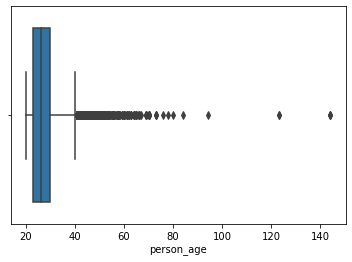

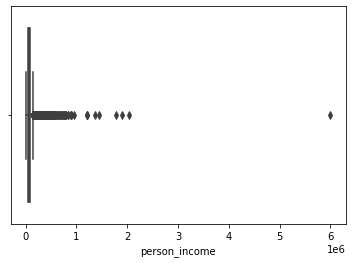

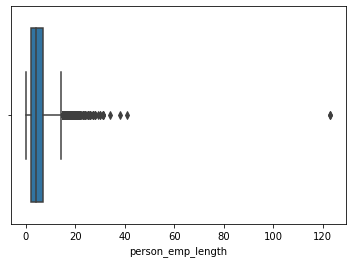

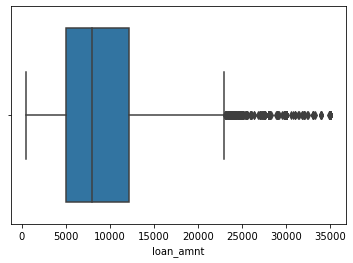

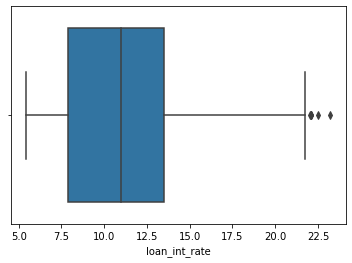

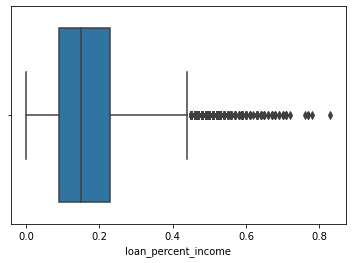

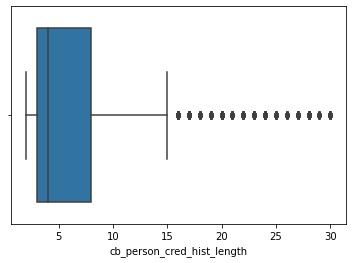

In [6]:
for i in out:
    sns.boxplot(df[i])
    plt.show()

In [7]:
def out1(col,i):
    ub = i
    outliers = df[df[col]>ub].index
    df.drop(outliers,inplace=True)
    sns.boxplot(df[col])
    plt.show()

In [8]:
out=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_cred_hist_length']

# Removing Outliers from person_age columns

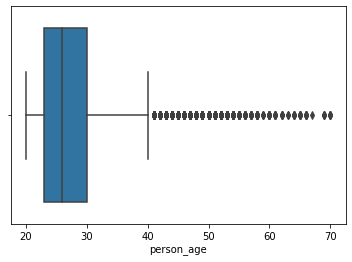

(32568, 12)

In [9]:
out1("person_age",70)
df.shape

# Removing Outliers from person_income columns

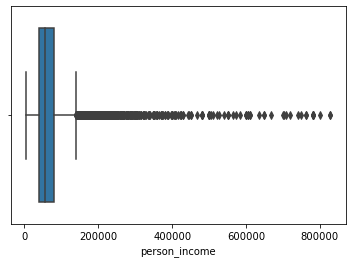

In [10]:
out1("person_income",828000)

# Removing Outliers from person_emp_length columns

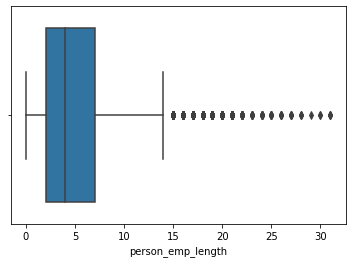

In [11]:
out1("person_emp_length",33)

# Removing Outliers from loan_int_rate columns

In [12]:
q1 = df["loan_int_rate"].quantile(0.25)
q3 = df["loan_int_rate"].quantile(0.75)
IQR = q3-q1
lb = q1-(1.5*IQR)
ub = q3+(1.5*IQR)
ub

21.825000000000003

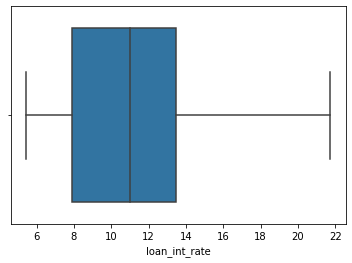

In [13]:
out1("loan_int_rate",21.825)

# Removing Outliers from loan_int_rate columns

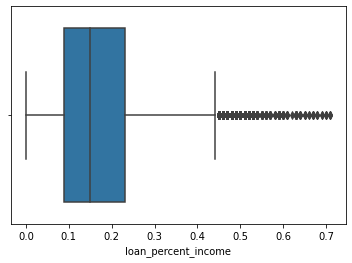

In [14]:
out1("loan_percent_income",0.71)

# Imputing Null values with mean

In [15]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3109
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
for i in out:
    print("mean of {}".format(i),":",df[i].mean())
    print("median of {}".format(i),":",df[i].median())

mean of person_age : 27.69709263015551
median of person_age : 26.0
mean of person_income : 65370.368522957775
median of person_income : 55000.0
mean of person_emp_length : 4.776822678001453
median of person_emp_length : 4.0
mean of loan_amnt : 9585.541520683508
median of loan_amnt : 8000.0
mean of loan_int_rate : 11.010010194025673
median of loan_int_rate : 10.99
mean of loan_percent_income : 0.17017179912717958
median of loan_percent_income : 0.15
mean of cb_person_cred_hist_length : 5.794148380355277
median of cb_person_cred_hist_length : 4.0


In [17]:
mean_emp_len=df["person_emp_length"].mean()

In [18]:
df["person_emp_length"].fillna(df["person_emp_length"].median(),inplace=True)

In [19]:
mean_loan_int=df["loan_int_rate"].mean()

In [20]:
df["loan_int_rate"].fillna(df["loan_int_rate"].mean(),inplace=True)

In [21]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Removing Duplicates

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32373 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32373 non-null  int64  
 1   person_income               32373 non-null  int64  
 2   person_home_ownership       32373 non-null  object 
 3   person_emp_length           32373 non-null  float64
 4   loan_intent                 32373 non-null  object 
 5   loan_grade                  32373 non-null  object 
 6   loan_amnt                   32373 non-null  int64  
 7   loan_int_rate               32373 non-null  float64
 8   loan_status                 32373 non-null  int64  
 9   loan_percent_income         32373 non-null  float64
 10  cb_person_default_on_file   32373 non-null  object 
 11  cb_person_cred_hist_length  32373 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [24]:
df.to_csv("df1.csv")

# Step:1- Defining the input(X) and output(y) variables

In [25]:
X=df[['person_age', 'person_income',"person_home_ownership", 'person_emp_length','loan_intent', 'loan_amnt',"loan_grade",
       'loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]
y=df["loan_status"]

# Step:2 - Splitting the data into train and test 

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Step:3 - Segregation of numericals and categorical columns and rescaling then using Standard Scaler ,Label Encoder and OneHotEncoding Transformation Techniques 

In [27]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])
X_test_num=X_test.select_dtypes(include=["int64","float64"])
X_train_cat_ord=X_train[['loan_grade']]
X_train_cat_nom=X_train[['person_home_ownership', 'loan_intent','cb_person_default_on_file']]
X_test_cat_nom=X_test[['person_home_ownership', 'loan_intent','cb_person_default_on_file']]
X_test_cat_ord=X_test[['loan_grade']]


# Step:3(i) -  Transformation of X_train_num & X_test_num using Standard Scaler 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_trans=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_test_num_trans=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

# Step : 3(ii) - Transformation of X_train_cat_ord & X_test_cat_ord using LabelEncoding

In [29]:
X_train_cat_le=pd.DataFrame(index=X_train_cat_ord.index)
le_coding={"A":7,"B":6,"C":5,"D":4,"E":3,"F":2,"G":7}
X_train_cat_le["loan_grade"]=X_train_cat_ord["loan_grade"].apply(lambda x : le_coding[x])
X_test_cat_le=pd.DataFrame(index=X_test_cat_ord.index)
X_test_cat_le["loan_grade"]=X_test_cat_ord["loan_grade"].apply(lambda x : le_coding[x])


# Step : 3(iii) - Transformation of X_train_cat_nom & X_test_cat_nom using OneHotEncoding

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first",sparse=False)
X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat_nom),
                               columns=encoder.get_feature_names_out(X_train_cat_nom.columns),index=X_train_cat_nom.index)
X_test_cat_ohe=pd.DataFrame(encoder.transform(X_test_cat_nom),
                               columns=encoder.get_feature_names_out(X_test_cat_nom.columns),index=X_test_cat_nom.index)
X_train_cat_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
25155,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18263,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
9878,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13134,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9856,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10810,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Step :3(iv) - Concating the X_train_num ,X_train_cat_ohe& X_train_cat_le  also X_test_num, X_test_cat_ohe & X_test_cat_le

In [31]:
X_train_conc=pd.concat([X_train_num_trans,X_train_cat_ohe,X_train_cat_le],axis=1)
X_test_conc=pd.concat([X_test_num_trans,X_test_cat_ohe,X_test_cat_le],axis=1)
X_train_conc

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
25155,0.047752,0.319687,0.813342,0.533133,0.794119,-0.099149,-0.197935,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
18263,0.047752,3.068035,-0.696608,2.264862,-0.004278,-0.474488,-0.197935,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5
9878,-0.276866,-0.487368,-1.199925,-0.096587,0.917450,0.370025,-0.445369,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5
1785,-1.088410,-0.954151,-1.199925,-1.198596,0.222906,-0.755993,-0.940236,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
14509,-0.601484,0.936713,0.058367,0.060843,-0.822155,-0.755993,-0.940236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13134,-0.276866,0.511635,1.316659,0.060843,0.109312,-0.568323,-0.692803,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
19786,-0.114557,-0.030509,0.310025,-0.962451,-1.013642,-1.131332,-0.197935,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7
9856,-0.601484,-0.007497,0.813342,-0.521648,0.222906,-0.662158,-0.940236,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
10810,-0.926101,-0.509180,0.310025,0.060843,-0.004278,0.651530,-0.445369,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5


# Step 4,5&6- Model Building,Prediction & Evaluation

# LogisticRegression

In [32]:
# model building
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics

Algorithm=[]
Accuracy_score=[]
Precision_score=[]
Confusion_matrix=[]
F1_score=[]
Roc_Auc_Score=[]
Log_Los=[]

Algorithm.append("LogisticRegression")
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_pred))
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))

metrics.accuracy_score(y_test,y_test_pred)

0.8580429948109711

# KNeighborsClassifier

In [33]:
# model building
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics



Algorithm.append("KNeighborsClassifier")
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_pred))
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))

metrics.accuracy_score(y_test,y_test_pred)

0.8895478131949592

# Support Vector Classifier

In [34]:
# model building
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics



Algorithm.append("Support Vector Classifier")
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_pred))
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))

metrics.accuracy_score(y_test,y_test_pred)

0.8964665184086978

# DecisionTreeClassifier

In [35]:
# model building
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics



Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_pred))
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))

metrics.accuracy_score(y_test,y_test_pred)

0.8873239436619719

# GaussianNB

In [36]:
# model building
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics



Algorithm.append("GaussianNB")
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_pred))
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))

metrics.accuracy_score(y_test,y_test_pred)

0.8129478626142822

# AdaBoostClassifier

In [37]:
# model building
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics



Algorithm.append("AdaBoostClassifier")
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_pred))
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))

metrics.accuracy_score(y_test,y_test_pred)

0.8847294292068199

# GradientBoostingClassifier

In [38]:
# model building
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics



Algorithm.append("GradientBoostingClassifier")
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_pred))
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))

metrics.accuracy_score(y_test,y_test_pred)

0.9256239189523103

# RandomForestClassifier

In [39]:
# model building
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_conc,y_train)
# prediction
y_test_pred=classifier.predict(X_test_conc)
# evaluation
from sklearn import metrics



Algorithm.append("RandomForestClassifier")
Accuracy_score.append(metrics.accuracy_score(y_test,y_test_pred))
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))

metrics.accuracy_score(y_test,y_test_pred)

0.9316777860143316

In [40]:
overview=pd.DataFrame({"Accuracy_score":Accuracy_score,"Precision_score":Precision_score,
                      "F1_score":F1_score,"Roc_Auc_Score":Roc_Auc_Score},index=Algorithm)

In [41]:
overview

,Accuracy_score,Precision_score,F1_score,Roc_Auc_Score
LogisticRegression,0.858043,0.744898,0.603930,0.730361
KNeighborsClassifier,0.889548,0.822343,0.703384,0.789269
Support Vector Classifier,0.896467,0.883319,0.709230,0.785634
DecisionTreeClassifier,0.887324,0.726968,0.740614,0.839002
GaussianNB,0.812948,0.549929,0.605524,0.762153
AdaBoostClassifier,0.884729,0.777700,0.703904,0.796563
GradientBoostingClassifier,0.925624,0.935609,0.800265,0.843049
RandomForestClassifier,0.931678,0.959969,0.815605,0.850489


# Conclusion
- In order to Decrease the Credit Risk  its better to use <font size="4"> __RandomForestClassifier__ </font> as it is predicting the defaulters with more accuracy than any other model.

# Sprint-2
## Exploratory Data Analysis

In [45]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Univariate Analysiis

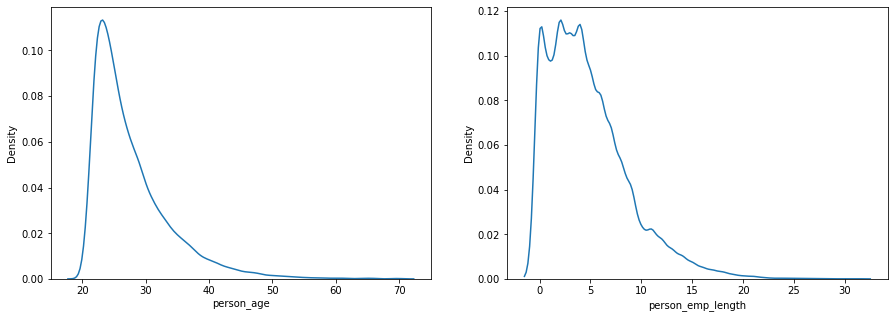

In [47]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=df['person_age'],ax=axes[0])
sns.kdeplot(x=df['person_emp_length'],ax=axes[1])
plt.show()

## Observation:
- The maximum density of the person age range is 20-30.
- The person_emp_length have most density range is 5-10.

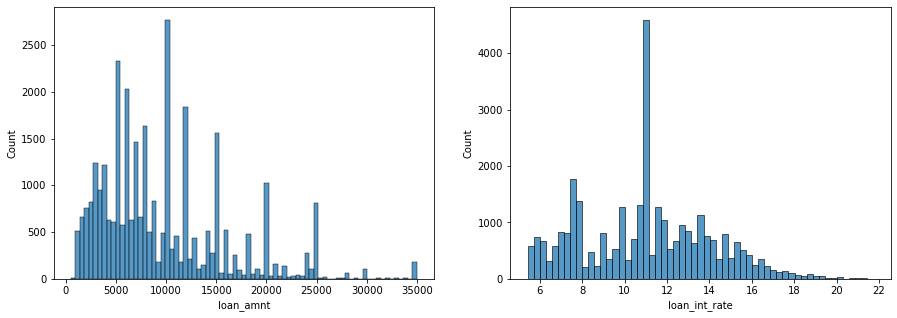

In [49]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.histplot(x=df['loan_amnt'],ax=axes[0])
sns.histplot(x=df['loan_int_rate'],ax=axes[1])
plt.show()

# Observation:
- The maximum loan amount lies between in the range 5000-120000.
-  The maximum loan amount interest rate lies between in the range 7.5-11.5.

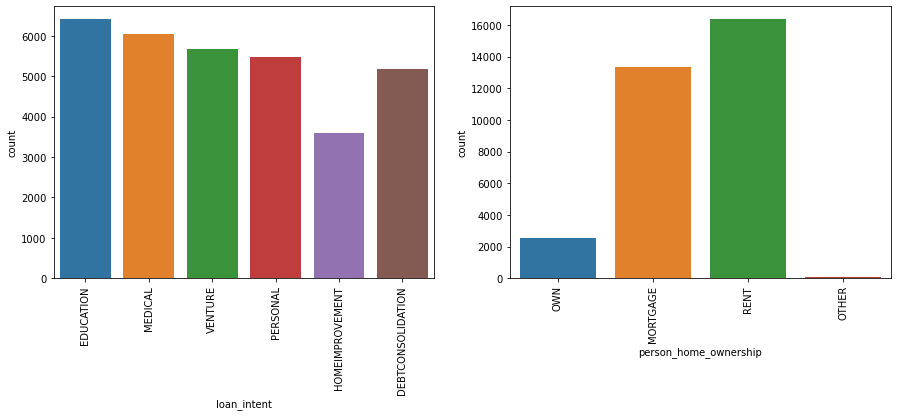

In [51]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['loan_intent'],ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=90)
sns.countplot(x=df['person_home_ownership'],ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Obsevation:
- Most of the people took loan for Education Purpose.
- Max users who took loan are living in a rent house.

# Bivariate Analysis

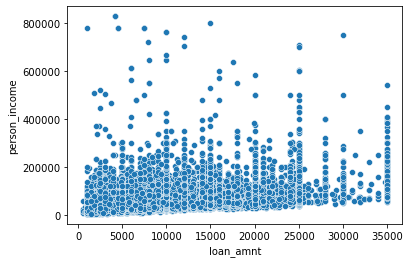

In [57]:
sns.scatterplot(x=df['loan_amnt'],y=df['person_income'])
plt.show()

# Observation:
- The persons who have income less than 300000 are more  loans.

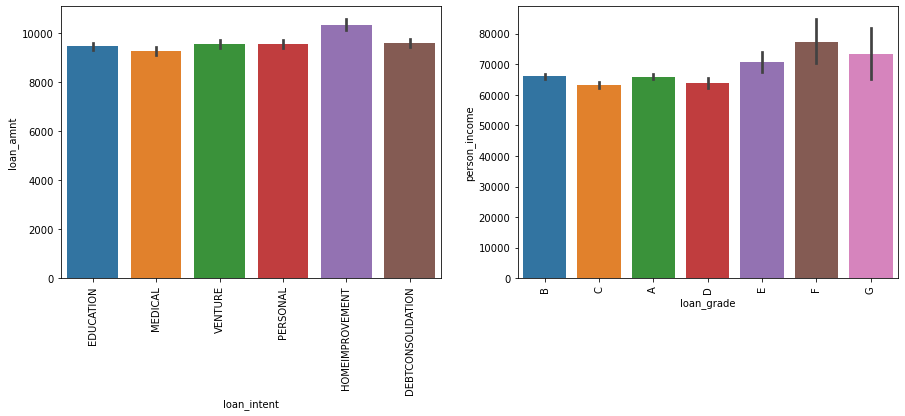

In [59]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=df['loan_intent'],y=df['loan_amnt'],ax=axes[0])
sns.barplot(x=df['loan_grade'],y=df['person_income'])
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- HOMEIMPROVEMENT Loan_intent get the high loan_amount.
- The person who have F grade those persons having more income.

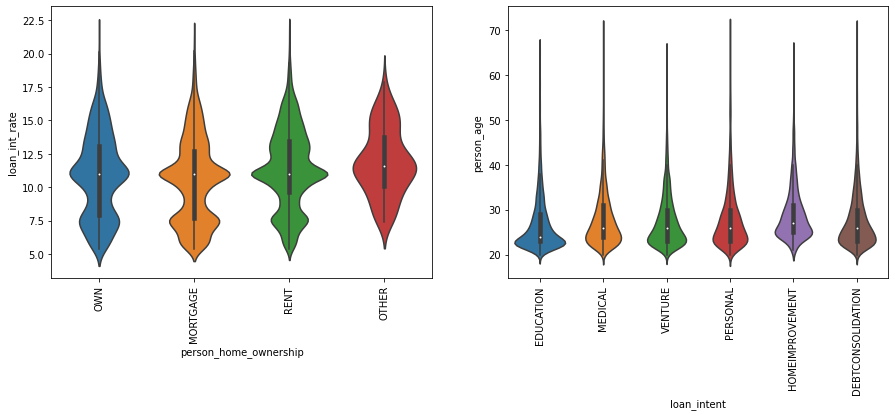

In [61]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.violinplot(x=df['person_home_ownership'],y=df['loan_int_rate'],ax=axes[0])
sns.violinplot(x=df['loan_intent'],y=df['person_age'])
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- Rent home persons loan_interest_rate high at the range 10.0-12.5.
- Education Loan_intent persons ages are lies between 20-25.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


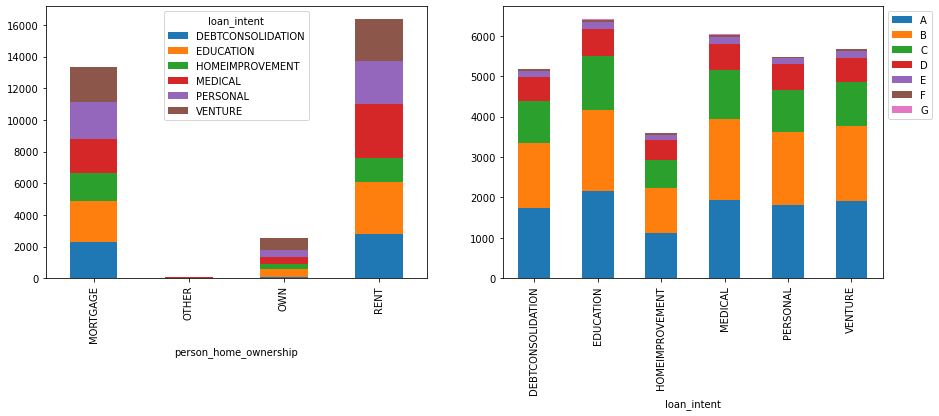

In [63]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
crosstab=pd.crosstab(df['person_home_ownership'],df['loan_intent'])
crosstab.plot(kind='bar',stacked=True,ax=axes[0])
plt.legend(bbox_to_anchor=(1,1))
crosstab=pd.crosstab(df['loan_intent'],df['loan_grade'])
crosstab.plot(kind='bar',stacked=True,ax=axes[1])
plt.legend(bbox_to_anchor=(1,1))
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- Rent_home_persons having very high intrest to get the loans compare to the others.
-  In that Rent_home_persons have every type of loans these are
    - 1.Debtconsolidation
    - 2.Education
    - 3.Homeimrovement
    - 4.Medical.
    - 5.Personal
    - 6.Venture

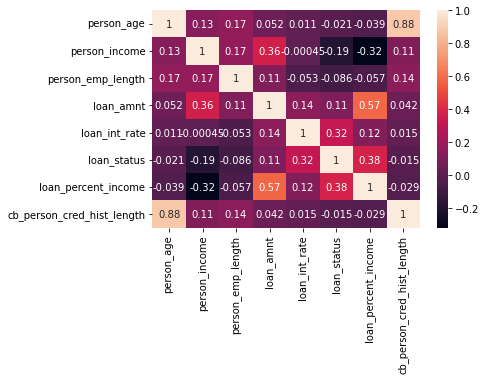

In [65]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Observation:
- Person_age and cb_person_cred_hist_length are higly correlated.
- Loan_int_rate and person_Age had very low positive correlation.